<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>
<br></br>

# Sprint Challenge
## *Data Science Unit 4 Sprint 1*

After a week of Natural Language Processing, you've learned some cool new stuff: how to process text, how turn text into vectors, and how to model topics from documents. Apply your newly acquired skills to one of the most famous NLP datasets out there: [Yelp](https://www.yelp.com/dataset/challenge). As part of the job selection process, some of my friends have been asked to create analysis of this dataset, so I want to empower you to have a head start.  

The real dataset is massive (almost 8 gigs uncompressed). I've sampled the data for you to something more managable for the Sprint Challenge. You can analyze the full dataset as a stretch goal or after the sprint challenge. As you work on the challenge, I suggest adding notes about your findings and things you want to analyze in the future.

## Challenge Objectives
*Successfully complete these all these objectives to earn a 2. There are more details on each objective further down in the notebook.*
* <a href="#p1">Part 1</a>: Write a function to tokenize the yelp reviews
* <a href="#p2">Part 2</a>: Create a vector representation of those tokens
* <a href="#p3">Part 3</a>: Use your tokens in a classification model on yelp rating
* <a href="#p4">Part 4</a>: Estimate & Interpret a topic model of the Yelp reviews

In [112]:
import os
import re
import spacy
import gensim
import pandas as pd
from gensim.corpora import Dictionary
from sklearn.pipeline import Pipeline
from gensim.utils import simple_preprocess
from sklearn.neighbors import NearestNeighbors
from sklearn.decomposition import TruncatedSVD
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from gensim.parsing.preprocessing import STOPWORDS
from gensim.models.ldamulticore import LdaMulticore
from sklearn.feature_extraction.text import TfidfVectorizer

# Plotting
import matplotlib.pyplot as plt
import seaborn as sns




In [7]:
yelp = pd.read_json('./data/review_sample.json', lines=True)

In [8]:
yelp.head()

,business_id,cool,date,funny,review_id,stars,text,useful,user_id
0,nDuEqIyRc8YKS1q1fX0CZg,1,2015-03-31 16:50:30,0,eZs2tpEJtXPwawvHnHZIgQ,1,"BEWARE!!! FAKE, FAKE, FAKE....We also own a sm...",10,n1LM36qNg4rqGXIcvVXv8w
1,eMYeEapscbKNqUDCx705hg,0,2015-12-16 05:31:03,0,DoQDWJsNbU0KL1O29l_Xug,4,Came here for lunch Togo. Service was quick. S...,0,5CgjjDAic2-FAvCtiHpytA
2,6Q7-wkCPc1KF75jZLOTcMw,1,2010-06-20 19:14:48,1,DDOdGU7zh56yQHmUnL1idQ,3,I've been to Vegas dozens of times and had nev...,2,BdV-cf3LScmb8kZ7iiBcMA
3,k3zrItO4l9hwfLRwHBDc9w,3,2010-07-13 00:33:45,4,LfTMUWnfGFMOfOIyJcwLVA,1,We went here on a night where they closed off ...,5,cZZnBqh4gAEy4CdNvJailQ
4,6hpfRwGlOzbNv7k5eP9rsQ,1,2018-06-30 02:30:01,0,zJSUdI7bJ8PNJAg4lnl_Gg,4,"3.5 to 4 stars\n\nNot bad for the price, $12.9...",5,n9QO4ClYAS7h9fpQwa5bhA


## Part 1: Tokenize Function
<a id="#p1"></a>

Complete the function `tokenize`. Your function should
- accept one document at a time
- return a list of tokens

You are free to use any method you have learned this week.

In [83]:
STOPWORDS = set(STOPWORDS).union(set(['food', 'like', 'place', 've', 'got', 'want', 'wasn']))

def tokenize(doc):
    
    return [token for token in simple_preprocess(doc) if token not in STOPWORDS]

yelp['tokens'] = yelp['text'].apply(tokenize)
yelp['tokens'][:5]

0    [beware, fake, fake, fake, small, business, lo...
1    [came, lunch, togo, service, quick, staff, fri...
2    [vegas, dozens, times, stepped, foot, circus, ...
3    [went, night, closed, street, party, best, act...
4    [stars, bad, price, lunch, seniors, pay, eatin...
Name: tokens, dtype: object

## Part 2: Vector Representation
<a id="#p2"></a>
1. Create a vector representation of the reviews
2. Write a fake review and query for the 10 most similiar reviews, print the text of the reviews. Do you notice any patterns?
    - Given the size of the dataset, it will probably be best to use a `NearestNeighbors` model for this. 

C:\Users\John\Anaconda3\envs\DS-U4-S1\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


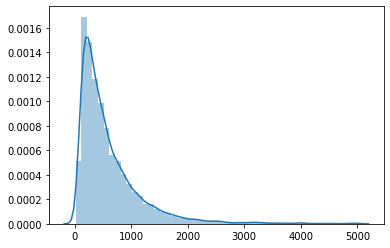

In [18]:
# Average word count for each doc, write fake review in similar range 100-200 words
doc_len = [len(doc) for doc in yelp['text']]
sns.distplot(doc_len)

In [84]:
vect = TfidfVectorizer(tokenizer=tokenize, stop_words='english', strip_accents='ascii', min_df=0.025, max_df=.95, ngram_range=(1,3))

sparse = vect.fit_transform(yelp['text'])

dtm = pd.DataFrame(sparse.todense(), columns=vect.get_feature_names())

dtm.head()

,able,absolutely,actually,ago,amazing,area,arrived,ask,asked,atmosphere,...,wonderful,work,working,worst,worth,wouldn,wrong,year,years,yelp
0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
1,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
2,0.0,0.0,0.000000,0.0,0.0,0.127822,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.151237,0.0,0.0
3,0.0,0.0,0.306583,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
4,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0


In [85]:
nn  = NearestNeighbors(n_neighbors=10, algorithm='ball_tree')
nn.fit(dtm)

NearestNeighbors(algorithm='ball_tree', leaf_size=30, metric='minkowski',
         metric_params=None, n_jobs=None, n_neighbors=10, p=2, radius=1.0)

In [86]:
yelp_master_42 = ["""
I went to this restaurant last Saturday for my best friend's birthday party. We made a reservation for seven people and were sat like 30 minutes later than we wanted. However, the place was worth the wait.
We ordered a few bottles of cabernet and lamb chops with a cherry chutnee that were to die for. Definitely recommend dining here!!! Just expect a long wait time. 
"""]

In [87]:
new = vect.transform(yelp_master_42)
print(nn.kneighbors(new.todense()))
for n in nn.kneighbors(new.todense())[1]:
    print(yelp.text.iloc[n])

(array([[0.9405055, 1.       , 1.       , 1.       , 1.       , 1.       ,
        1.       , 1.       , 1.       , 1.       ]]), array([[3672, 3189, 6311, 7674, 6204, 3543,  469, 4062, 2939, 9858]],
      dtype=int64))
3672    I only reccommend going here after midnight be...
3189    The GTA has a plethora of Sri Lankan take out ...
6311    天氣很熱吃不下東西，今天我點了一個韓國冷面湯、餐後點了甜點，冰沙系列不會太甜膩，覺得店家很用...
7674    J'ai une relation amour/haine avec le marché J...
6204    旅行でラスベガスに来ましたがネイルがはげてるのが気になり、探したお店でした。\n質問にも丁寧...
3543                                      $25 for 2 weeks
469     O  o  thenk 6nnn  .b  cgv  xx TV cvg  9 nvehxc...
4062    Place is horrible it smells like cigarets smok...
2939    The closest to actual Mexican food this Southe...
9858    Nous avons pris 2 bières selon la formule 2 bi...
Name: text, dtype: object


In [82]:
# Only four nearest neighbors in english
print(yelp.text.iloc[3672], '\n')
print(yelp.text.iloc[3189], '\n')
print(yelp.text.iloc[4062], '\n')
print(yelp.text.iloc[2939], '\n')

I only reccommend going here after midnight because the wings are 25 cents each! 

You cannot go wrong with that, but expect to wait at least 30 minutes. Yeah, it sounds like a long time, but if you're drunk enough and you can send someone to put your name on the list, it is definitely worth it. 

The GTA has a plethora of Sri Lankan take out food joints and this has been our firm favourite for a while. Their pan rolls ( Chinese Rolls) are superb 

Place is horrible it smells like cigarets smoke penetrated. Out dated and nasty 

The closest to actual Mexican food this Southern California girl has found! 



#### Results changed after adding more stopwords. Now only one focuses on the wait times, three recommend coming back, but one does not recommend and does not match the description in anyway.

## Part 3: Classification
<a id="#p3"></a>
Your goal in this section will be to predict `stars` from the review dataset. 

1. Create a piepline object with a sklearn `CountVectorizer` or `TfidfVector` and any sklearn classifier. Use that pipeline to estimate a model to predict `stars`. Use the Pipeline to predict a star rating for your fake review from Part 2. 
2. Tune the entire pipeline with a GridSearch

In [66]:
from sklearn.linear_model import SGDClassifier

svd = TruncatedSVD(algorithm='randomized', n_iter=10)
vect = TfidfVectorizer(stop_words='english', ngram_range=(1,3))
lsi = Pipeline([('vect', vect), ('svd', svd)])
clf = RandomForestClassifier()

pipe = Pipeline([('lsi', lsi), ('clf', clf)])

parameters = {
    'lsi__svd__n_components': (10,100,200),
    'lsi__vect__max_features': (250,500),
}


In [67]:
grid_search = GridSearchCV(pipe,parameters, cv=5, n_jobs=-1, verbose=1)
grid_search.fit(yelp['text'], yelp['stars'] )

Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:  1.6min finished
C:\Users\John\Anaconda3\envs\DS-U4-S1\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=Pipeline(memory=None,
     steps=[('lsi', Pipeline(memory=None,
     steps=[('vect', TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.float64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 3), norm=...obs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False))]),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'lsi__svd__n_components': (10, 100, 200), 'lsi__vect__max_features': (250, 500)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=1)

In [70]:
pred = grid_search.predict(yelp_master_42)
print(f"Yelp_master_42 most likely would give {pred[0]} stars for that meal he had reviewed.")

Yelp_master_42 most likely would give 5 stars for that meal he had reviewed.


## Part 4: Topic Modeling

Let's find out what those yelp reviews are saying! :D

1. Estimate a LDA topic model of the review text
    - Keep the `iterations` parameter at or below 5 to reduce run time
    - The `workers` parameter should match the number of physical cores on your machine.
2. Create 1-2 visualizations of the results
    - You can use the most important 3 words of a topic in relevant visualizations. Refer to yesterday's notebook to extract. 
3. In markdown, write 1-2 paragraphs of analysis on the results of your topic model

__*Note*__: You can pass the DataFrame column of text reviews to gensim. You do not have to use a generator.

Learn the vocubalary of the yelp data:

In [120]:
STOPWORDS = set(STOPWORDS).union(set(['food','good','great', 'place', 've', 'got', 'want', 'wasn', 'came', 'service', 'like', 'come', 'went', 'said', 'ordered']))

def tokenize(doc):
    
    return [token for token in simple_preprocess(doc) if token not in STOPWORDS]

yelp['tokens'] = yelp['text'].apply(tokenize)
yelp['tokens'][:5]

0    [beware, fake, fake, fake, small, business, lo...
1    [lunch, togo, quick, staff, friendly, complain...
2    [vegas, dozens, times, stepped, foot, circus, ...
3    [night, closed, street, party, best, actually,...
4    [stars, bad, price, lunch, seniors, pay, eatin...
Name: tokens, dtype: object

In [121]:
id2word = corpora.Dictionary(yelp['tokens'])
len(id2word.keys())

id2word.filter_extremes(no_below=10, no_above=0.90)
len(id2word.keys())

4767

Create a bag of words representation of the entire corpus

In [122]:
corpus = [id2word.doc2bow(token) for token in yelp['tokens']]

Your LDA model should be ready for estimation: 

In [125]:
lda = LdaMulticore(corpus=corpus,
                   id2word=id2word,
                   iterations=5,
                   workers=2,
                   num_topics = 10# You can change this parameter
                  )

C:\Users\John\Anaconda3\envs\DS-U4-S1\lib\site-packages\gensim\models\ldamodel.py:826: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
C:\Users\John\Anaconda3\envs\DS-U4-S1\lib\site-packages\gensim\models\ldamodel.py:826: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
C:\Users\John\Anaconda3\envs\DS-U4-S1\lib\site-packages\gensim\models\ldamodel.py:826: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt

In [126]:
words = [re.findall(r'"([^"]*)"',t[1]) for t in lda.print_topics()]
topics = [' '.join(t[0:5]) for t in words]
for id, t in enumerate(topics): 
    print(f"------ Topic {id} ------")
    print(t, end="\n")

------ Topic 0 ------
time order nice love try
------ Topic 1 ------
time best amazing staff nice
------ Topic 2 ------
time best nice little staff
------ Topic 3 ------
time try staff order wait
------ Topic 4 ------
time love little nice better
------ Topic 5 ------
time order love staff nice
------ Topic 6 ------
time chicken people best staff
------ Topic 7 ------
time best day order love
------ Topic 8 ------
time restaurant love nice try
------ Topic 9 ------
time nice best definitely people


Create 1-2 visualizations of the results

In [127]:
import pyLDAvis.gensim

pyLDAvis.enable_notebook()

pyLDAvis.gensim.prepare(lda, corpus, id2word)

C:\Users\John\Anaconda3\envs\DS-U4-S1\lib\site-packages\pyLDAvis\_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
2     -0.002390 -0.001555       1        1  10.244228
6     -0.003637 -0.001537       2        1  10.162395
1     -0.004910  0.000358       3        1  10.130557
8      0.001585  0.001715       4        1  10.076966
7     -0.001219  0.002602       5        1  10.074697
4      0.000309  0.003481       6        1  10.022674
0      0.002292  0.000207       7        1  10.018530
9      0.002240  0.001862       8        1   9.836426
3      0.001542 -0.006449       9        1   9.745913
5      0.004190 -0.000684      10        1   9.687626, topic_info=     Category         Freq        Term        Total  loglift  logprob
103   Default  1808.000000        best  1808.000000  30.0000  30.0000
29    Default  3424.000000        time  3424.000000  29.0000  29.0000
98    Default   915.000000       vegas   915.000000  28.0000  28.0000
1024  Default  1397.000000     chicken  1397.000000  27.0000  27.0000
329   Default  1519.000000       order  1519.000000  26.0000  26.0000
315   Default   939.000000       fresh   939.000000  25.0000  25.0000
556   Default  1377.000000  restaurant  1377.000000  24.0000  24.0000
624   Default  1652.000000        love  1652.000000  23.0000  23.0000
166   Default  1373.000000     amazing  1373.000000  22.0000  22.0000
31    Default   981.000000        wait   981.000000  21.0000  21.0000
340   Default   816.000000       sauce   816.000000  20.0000  20.0000
324   Default  1426.000000      little  1426.000000  19.0000  19.0000
95    Default   860.000000       times   860.000000  18.0000  18.0000
263   Default  1463.000000         try  1463.000000  17.0000  17.0000
978   Default   641.000000      coffee   641.000000  16.0000  16.0000
112   Default  1449.000000      people  1449.000000  15.0000  15.0000
158   Default  1166.000000   recommend  1166.000000  14.0000  14.0000
142   Default   879.000000       think   879.000000  13.0000  13.0000
668   Default   555.000000       sushi   555.000000  12.0000  12.0000
38    Default  1573.000000       staff  1573.000000  11.0000  11.0000
361   Default   843.000000       asked   843.000000  10.0000  10.0000
291   Default   660.000000         big   660.000000   9.0000   9.0000
41    Default   759.000000        area   759.000000   8.0000   8.0000
135   Default   907.000000       price   907.000000   7.0000   7.0000
380   Default  1213.000000         day  1213.000000   6.0000   6.0000
366   Default  1160.000000      better  1160.000000   5.0000   5.0000
79    Default   980.000000       night   980.000000   4.0000   4.0000
1094  Default   428.000000       steak   428.000000   3.0000   3.0000
657   Default   469.000000         ice   469.000000   2.0000   2.0000
827   Default   705.000000     looking   705.000000   1.0000   1.0000
...       ...          ...         ...          ...      ...      ...
31    Topic10   118.021576        wait   981.450195   0.2162  -5.7611
205   Topic10    74.507278        meat   589.510437   0.2659  -6.2211
72    Topic10    91.907608        long   755.032837   0.2283  -6.0112
166   Topic10   154.372269     amazing  1373.161011   0.1488  -5.4926
624   Topic10   181.032181        love  1652.058350   0.1232  -5.3333
222   Topic10   143.642197  experience  1297.027588   0.1338  -5.5646
79    Topic10   112.755630       night   980.252563   0.1717  -5.8067
177   Topic10   129.394257       going  1155.658569   0.1448  -5.6691
38    Topic10   167.376602       staff  1573.944580   0.0932  -5.4117
33    Topic10   150.792404    friendly  1393.356689   0.1108  -5.5160
208   Topic10   123.108109       right  1104.762695   0.1400  -5.7189
200   Topic10    77.492317        away   641.171265   0.2212  -6.1818
29    Topic10   291.069580        time  3424.938232  -0.1310  -4.8584
556   Topic10   140.090347  restaurant  1377.404053   0.0487  -5.5897
460   Topic10   104.119247        work   946.297485   0.1273  -5.8864
135   Topic10    99

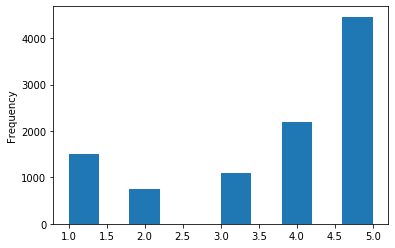

In [132]:
yelp['stars'].plot(kind='hist');

The reviews of food in the las vegas area are overall very positive through yelp. As you can see from the LDAvis there is a large variety of options as well besides the most popular reviews focusing on food.
People have high recommendations of places and little use of negative words, long wait times, and words such as best, love, and amazing standing out in every document.
However, most people when reviewing leave very similar phrases in regards to positive reviews and usually add more details only on the extreme positive and negative reviews. Besides reviews of the experiences, it is 
also shown that location/delivery are important aspects as well.

## Stretch Goals

Complete one of more of these to push your score towards a three: 
* Incorporate named entity recognition into your analysis
* Compare vectorization methods in the classification section
* Analyze more (or all) of the yelp dataset - this one is v. hard. 
* Use a generator object on the reviews file - this would help you with the analyzing the whole dataset.
* Incorporate any of the other yelp dataset entities in your analysis (business, users, etc.)